# CA2  Capstone Project
# Name: Denisse Garcia
# Student ID: sbs

# **Importing Necessary Modules**

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# **Reading the Dataset**

In [2]:
# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

data.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
# Checking the Dimensions
data.shape

(8469, 17)

### **There are 8469 samples with 17 features in our dataset**

In [4]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

## Data Dictionary 

1. **Ticket ID**: A unique identifier for each support ticket.
2. **Customer Name**: The name of the customer who submitted the ticket.
3. **Customer Email**: The email address of the customer.
4. **Customer Age**: The age of the customer.
5. **Customer Gender**: The gender of the customer.
6. **Product Purchased**: The product for which the support ticket was created.
7. **Date of Purchase**: The date when the product was purchased.
8. **Ticket Type**: The type of support ticket (e.g., technical issue, billing inquiry).
9. **Ticket Subject**: The subject of the support ticket.
10. **Ticket Description**: A detailed description of the issue or inquiry.
11. **Ticket Status**: The current status of the ticket (e.g., open, closed).
12. **Resolution**: The resolution provided for the ticket.
13. **Ticket Priority**: The priority level of the ticket (e.g., low, medium, high).
14. **Ticket Channel**: The channel through which the ticket was submitted (e.g., email, phone).
15. **First Response Time**: The timestamp of the first response to the ticket.
16. **Time to Resolution**: The timestamp when the ticket was resolved.
17. **Customer Satisfaction Rating**: The satisfaction rating provided by the customer after the ticket was resolved.


### **All dtypes are correct**

# **Exploratory Data Analysis**

To understand the data and identify patterns, let's conduct some exploratory data analysis.

1. General Information:

- Check the data types and missing values.
- Data Normalization
- Summary statistics.

2. Data Visualization:

- Distribution of tickets over time.
- Breakdown by ticket type, priority, and channel.
- Customer demographics (age, gender).

3. Peak Demand Periods:

- Identify peak hours, days, and months.

4. Case Volume Forecasting:

- Time series analysis for predicting case volume.

Let's start by checking the general information and summary statistics of the dataset.

- Loads and preprocesses the data.
- Converts date columns to datetime and creates new features.
- Handles missing values.

# 1. Validating missing values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

### Insights from Initial Analysis

**Missing Values**

Columns Resolution, First Response Time, Time to Resolution, and Customer Satisfaction Rating have significant missing values.

**Handle Missing Values**
You can fill in missing values, drop them, or impute them depending on the context of the data.

In [6]:
# Summary statistics
data.describe(include='all')

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


## Descriptive Statistics:

- Customer ages range from 18 to 99.
- The most frequent ticket channel is email.
- The mean customer satisfaction rating is approximately 3 out of 5.

# 2. **Heatmap To Visualize the Missing Values**

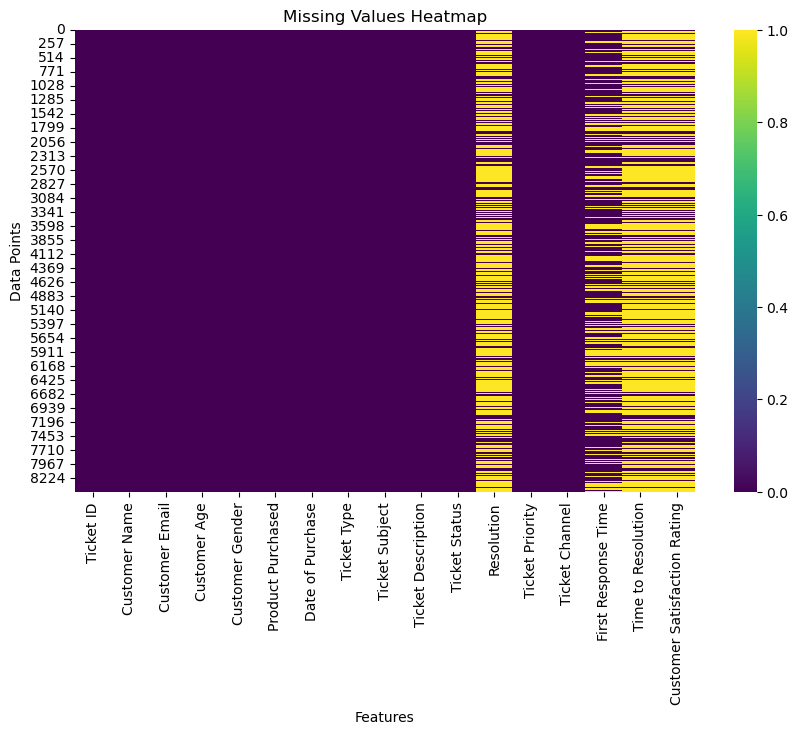

Number of missing values per column:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [7]:
missing_values = data.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Print the number of missing values for each column
missing_count = data.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

**It can be seen that Resolution, First Response Time, Time to Resolution and Customer Satisfaction Rating has missing values there.**

**The columns are showing values as missing because there are Nan values in those samples, Later we will impute them with suitable values**
For Customer Satisfaction Rating, consider imputation.


#### Data Types:

Columns related to date and time (Date of Purchase, First Response Time, Time to Resolution) should be converted to datetime objects for analysis.

## Filling the Missing Values


In [8]:
# Filling missing values in the 'Resolution' column with 'None'
data['Resolution'] = data['Resolution'].fillna('None')
data['First Response Time'] = data['First Response Time'].fillna('None')
data['Time to Resolution'] = data['Time to Resolution'].fillna('None')

# Filling missing values with median in specified columns
for column in  ['Customer Satisfaction Rating']:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)

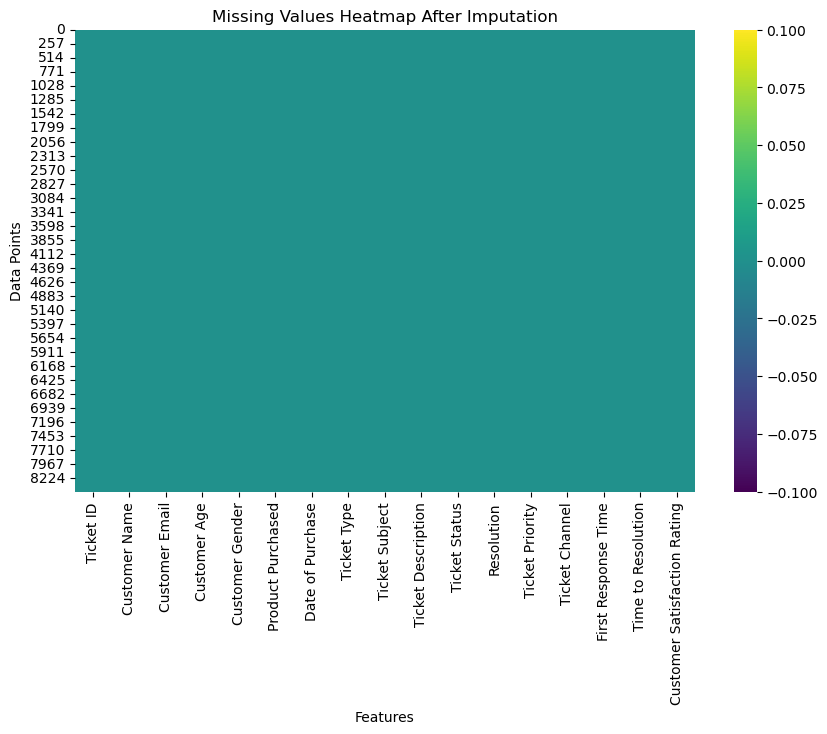

Number of missing values per column:
Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


In [9]:
missing_values = data.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap After Imputation')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Print the number of missing values for each column
missing_count = data.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

### **Now there are no missing values in our dataset**

# **Seperating Features into Numerical and Categorical Features**

In [10]:
# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Select categorical features
categorical_features = data.select_dtypes(include=['object'])

print(f'Numerical Features are: {len(numerical_features.columns)}')
print(f'Categorical Features are: {len(categorical_features.columns)}')

Numerical Features are: 3
Categorical Features are: 14


# Data Preparation

We prepare the data including data cleaning, feature engineering, and EDA.

**Hypothesis**  The hypothesis is that longer response times correlate with lower customer satisfaction, and customer satisfaction varies across different support channels.


## Data Preprocessing

*Convert Date Columns*: Convert Date of Purchase, First Response Time, and Time to Resolution to datetime format.
Extract features like year, month, day, and hour.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
#Converting date columns to datetime objects helps in extracting date related features.

data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')

# Calculate Response Time in hours (1 hour = 3600 sec) - the data is represented in Secs
data['Response Time'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600.0


# Handle missing values in Customer Satisfaction Rating
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(), inplace=True)

# Drop rows with missing values in Response Time
data.dropna(subset=['Response Time'], inplace=True)

# Select relevant columns
data = data[['Response Time', 'Customer Satisfaction Rating', 'Ticket Channel']]

# Ensure Ticket Channel is treated as a category
data['Ticket Channel'] = data['Ticket Channel'].astype('category')

# Display the first few rows of the cleaned dataset
print(data.head())


   Response Time  Customer Satisfaction Rating Ticket Channel
0   19236.260000                      2.991333   Social media
1   17776.760556                      2.991333           Chat
2   25259.243889                      3.000000   Social media
3   22327.494444                      3.000000   Social media
4   29112.211667                      1.000000          Email


# Exploratory Data Analysis (EDA)

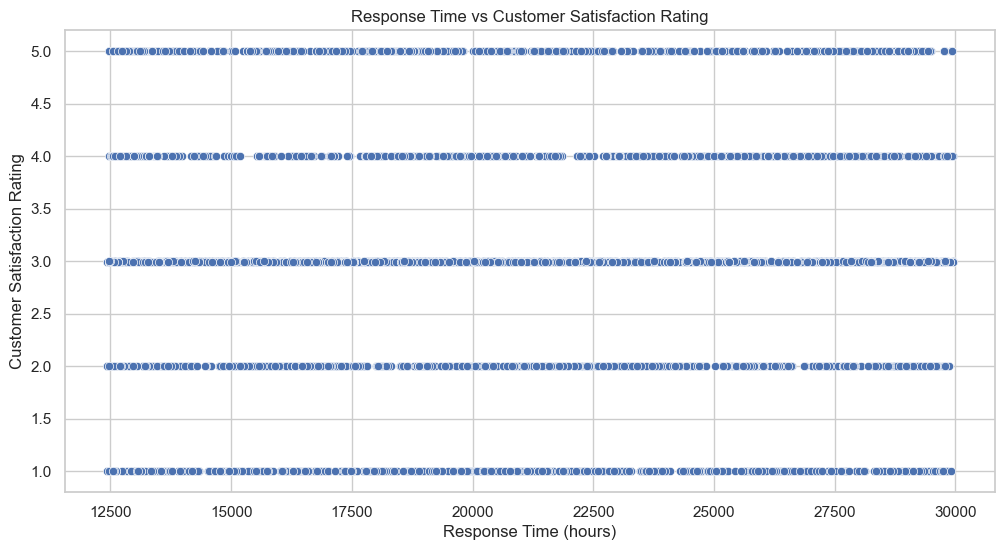

In [12]:
# Set up the visual style
sns.set(style="whitegrid")

# Scatter plot of Response Time vs Customer Satisfaction Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Response Time', y='Customer Satisfaction Rating', data=data)
plt.title('Response Time vs Customer Satisfaction Rating')
plt.xlabel('Response Time (hours)')
plt.ylabel('Customer Satisfaction Rating')
plt.show()


#### This scatter plot visualizes the relationship between response times and customer satisfaction ratings. Each point represents a ticket, with the response time on the x-axis and the customer satisfaction rating on the y-axis. 

We can visualize the relationship between response time (in hours  where 1 hour = 3600 sec)  and customer satisfaction rating (on a scale from 1 to 5). Each point represents a support ticket, with its position determined by the response time and the corresponding customer satisfaction rating.


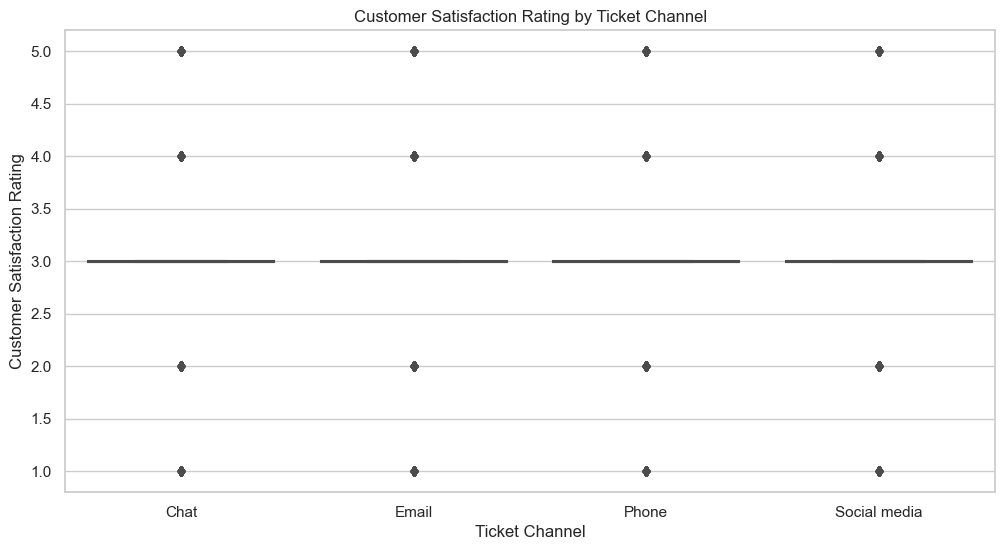

In [13]:
# Box plot of Customer Satisfaction Rating by Ticket Channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticket Channel', y='Customer Satisfaction Rating', data=data)
plt.title('Customer Satisfaction Rating by Ticket Channel')
plt.xlabel('Ticket Channel')
plt.ylabel('Customer Satisfaction Rating')
plt.show()

#### This box plot compares customer satisfaction ratings across different support channels. It shows the distribution of ratings for each channel, highlighting the median, quartiles, and potential outliers.

Given the scatter plot and box plot alone, it's challenging to visually confirm the hypothesis that "longer response times correlate with lower customer satisfaction." To validate this hypothesis, we need to perform statistical analysis

# Correlation Analysis

In [14]:
# Calculate correlation between Response Time and Customer Satisfaction Rating
correlation = data[['Response Time', 'Customer Satisfaction Rating']].corr()
print('Correlation between Response Time and Customer Satisfaction Rating:')
print(correlation)


Correlation between Response Time and Customer Satisfaction Rating:
                              Response Time  Customer Satisfaction Rating
Response Time                      1.000000                      0.026877
Customer Satisfaction Rating       0.026877                      1.000000


The correlation coefficient measures the linear relationship between response time and customer satisfaction rating. A negative correlation indicates that as response time increases, customer satisfaction decreases.

### Response Time vs. Customer Satisfaction Rating: 0.026877

This value is very close to zero, indicating a very weak positive linear relationship between response time and customer satisfaction rating, this means that variations in response time do not significantly affect customer satisfaction ratings based on this analysis.

While the correlation coefficient provides a measure of linear relationship, it does not capture non-linear relationships. Therefore, it might be worthwhile to explore other types of analyses, such as regression analysis, to see if there are more complex interactions.

Additionally, customer satisfaction may be influenced by other factors not considered in this correlation analysis, such as the nature of the issue, the resolution provided, or the support channel used.

# Regression Analysis

In [15]:
import statsmodels.api as sm
import patsy

# Prepare the data for regression
# We use patsy to create the design matrices for the regression model
y, X = patsy.dmatrices('Q("Customer Satisfaction Rating") ~ Q("Response Time") + C(Q("Ticket Channel"))', data=data, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Q("Customer Satisfaction Rating")   R-squared:                       0.001
Model:                                           OLS   Adj. R-squared:                  0.001
Method:                                Least Squares   F-statistic:                     1.958
Date:                               Sun, 19 May 2024   Prob (F-statistic):             0.0980
Time:                                       12:12:43   Log-Likelihood:                -7926.7
No. Observations:                               5650   AIC:                         1.586e+04
Df Residuals:                                   5645   BIC:                         1.590e+04
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                                             coef    std err

#### The regression model quantifies the impact of response time and support channels on customer satisfaction. The summary includes coefficients, p-values, and other statistics that help interpret the model.

### Random Forest Regression

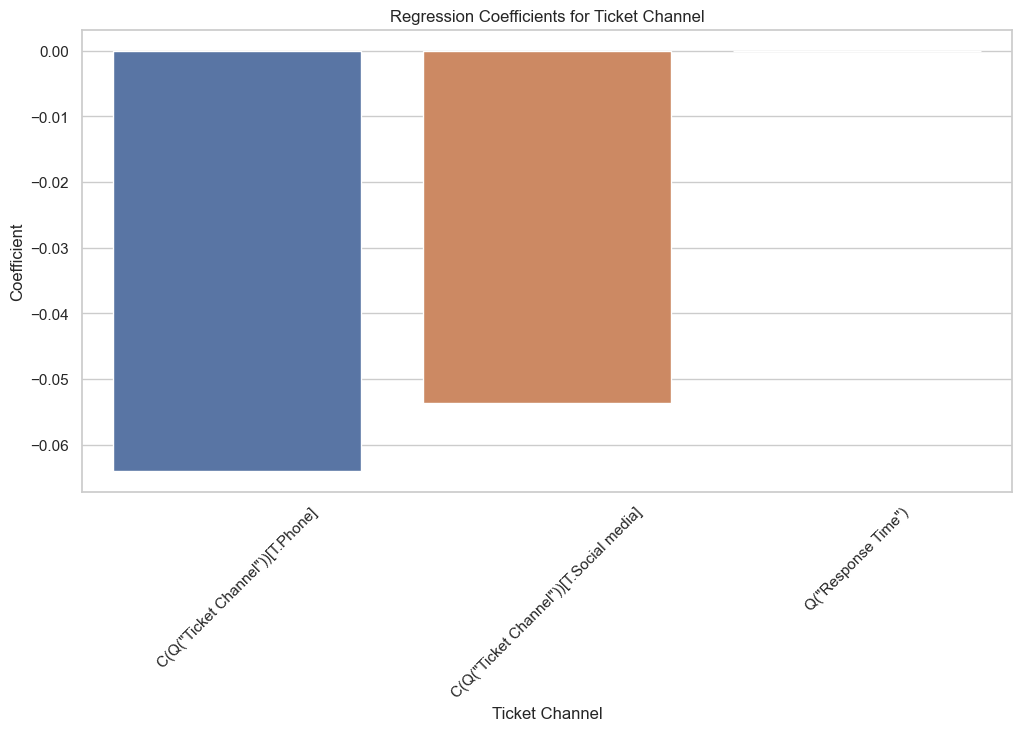

In [16]:
# Plot regression coefficients for Ticket Channel
plt.figure(figsize=(12, 6))
sns.barplot(x=results.params.index[2:], y=results.params.values[2:])
plt.title('Regression Coefficients for Ticket Channel')
plt.xlabel('Ticket Channel')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

#### This bar plot visualizes the regression coefficients for the ticket channels. It shows the effect of each channel on customer satisfaction, controlling for response time. A positive coefficient indicates higher satisfaction, while a negative coefficient indicates lower satisfaction.

## Model 2 - Data Preparation for ARIMA

let's prepare the data for time-series forecasting by aggregating the number of tickets per day for each channel.

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Prepare data for time series forecasting
data['Ticket Created Date'] = data['Date of Purchase'].dt.date
daily_tickets = data.groupby(['Ticket Created Date', 'Ticket Channel']).size().unstack(fill_value=0)

# Display the first few rows of the prepared time series data
print(daily_tickets.head())


Ticket Channel       Chat  Email  Phone  Social media
Ticket Created Date                                  
2020-01-01              3      2      2             1
2020-01-02              2      4      2             4
2020-01-03              5      4      3             3
2020-01-04              2      1      1             4
2020-01-05              4      3      0             6


## ARIMA Model

 ##### ARIMA model to forecast the number of tickets for the email channel

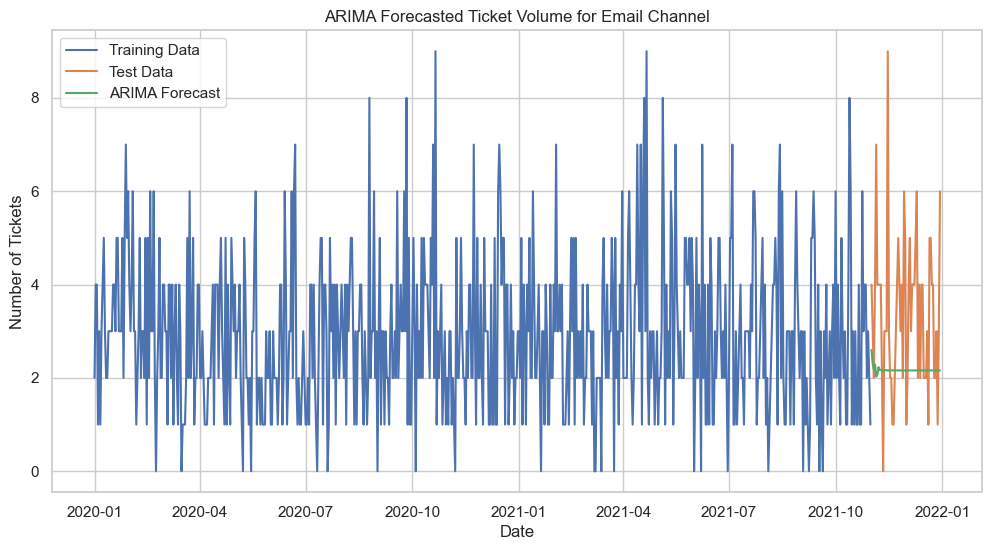

In [19]:
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

# Example for the Email channel
email_tickets = daily_tickets[['Email']]

# Split data into training and test sets
train = email_tickets[:-60]
test = email_tickets[-60:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
arima_fit = model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=60)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()


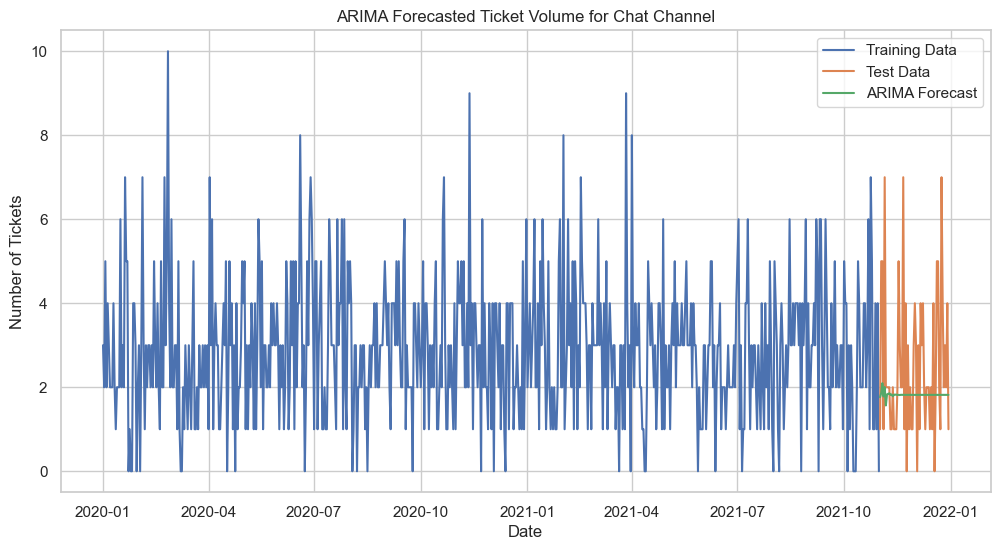

In [25]:
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

# For the Chat channel
chat_tickets = daily_tickets[['Chat']]

# Split data into training and test sets
train = chat_tickets[:-60]
test = chat_tickets[-60:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
arima_fit = model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=60)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecasted Ticket Volume for Chat Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

### The ARIMA model will help forecast future ticket volumes for different channels, allowing for better resource planning and allocation.

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate the model
ridge_pred = ridge_model.predict(X_test)
print('Ridge Regression - Mean Squared Error:', mean_squared_error(y_test, ridge_pred))
print('Ridge Regression - R^2 Score:', r2_score(y_test, ridge_pred))


Ridge Regression - Mean Squared Error: 0.9814484591087826
Ridge Regression - R^2 Score: -0.0024714545835093915


In [28]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict and evaluate the model
lasso_pred = lasso_model.predict(X_test)
print('Lasso Regression - Mean Squared Error:', mean_squared_error(y_test, lasso_pred))
print('Lasso Regression - R^2 Score:', r2_score(y_test, lasso_pred))


Lasso Regression - Mean Squared Error: 0.9814634174739841
Lasso Regression - R^2 Score: -0.0024867333625246957


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
rf_pred = rf_model.predict(X_test)
print('Random Forest Regression - Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Random Forest Regression - R^2 Score:', r2_score(y_test, rf_pred))


Random Forest Regression - Mean Squared Error: 1.3052688180392695
Random Forest Regression - R^2 Score: -0.33322816750919415


#  Appendix

# Exploratory Data Analysis (EDA)


# Visualizes the data through various plots:

NOTE: This visualizetion are pre data preparation

- Monthly ticket distribution.
- Distribution of ticket types, priority levels, and channels.
- Customer age and gender distribution.
- Distribution of response and resolution times.
- Ticket submissions by hour of the day.

In [30]:

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Create new features from datetime columns
data['Purchase Year'] = data['Date of Purchase'].dt.year
data['Purchase Month'] = data['Date of Purchase'].dt.month
data['Purchase Day'] = data['Date of Purchase'].dt.day
data['Response Hour'] = data['First Response Time'].dt.hour

# Calculate Response Time and Resolution Time
data['Response Time'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600.0
data['Resolution Time'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600.0

# Handle missing values
data['Resolution'].fillna('No Resolution', inplace=True)
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(), inplace=True)

# Set up the visual style
sns.set(style="whitegrid")

# Display the first few rows to verify changes
print(data.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

The data is preprocessed, let's perform some visualizations and analyses to understand the distribution and patterns.

## *Ticket Distribution Over Time:*

Plot the number of tickets over time (daily, monthly).

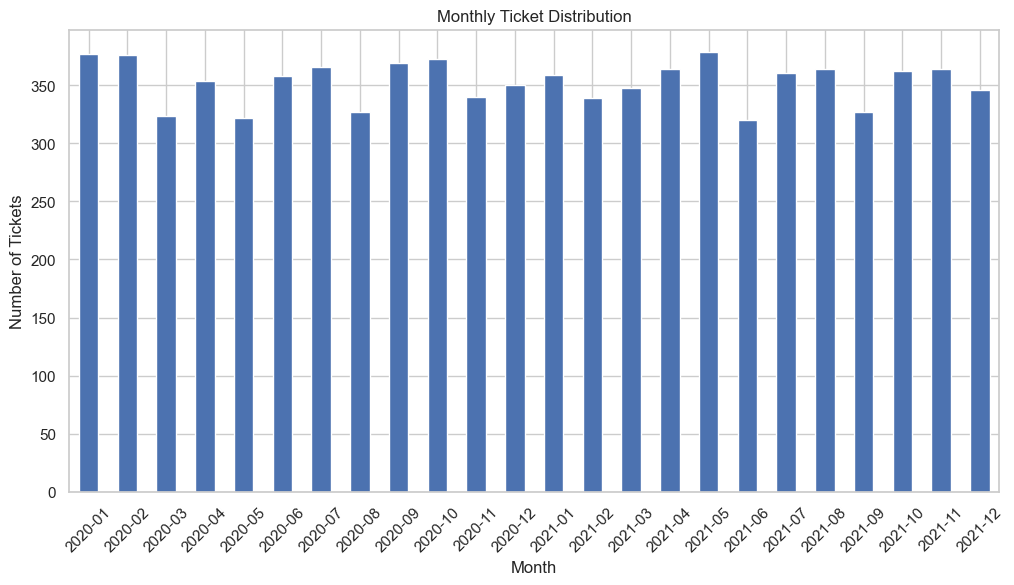

In [31]:
# 1. Ticket Distribution Over Time (Monthly)

data['Ticket Created Month'] = data['Date of Purchase'].dt.to_period('M')
monthly_tickets = data['Ticket Created Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_tickets.plot(kind='bar')
plt.title('Monthly Ticket Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()



## Plot Ticket Type, Priority, and Channel:

2. Distribution of ticket types.
3. Distribution of ticket priority levels.
4. Distribution of ticket channels.

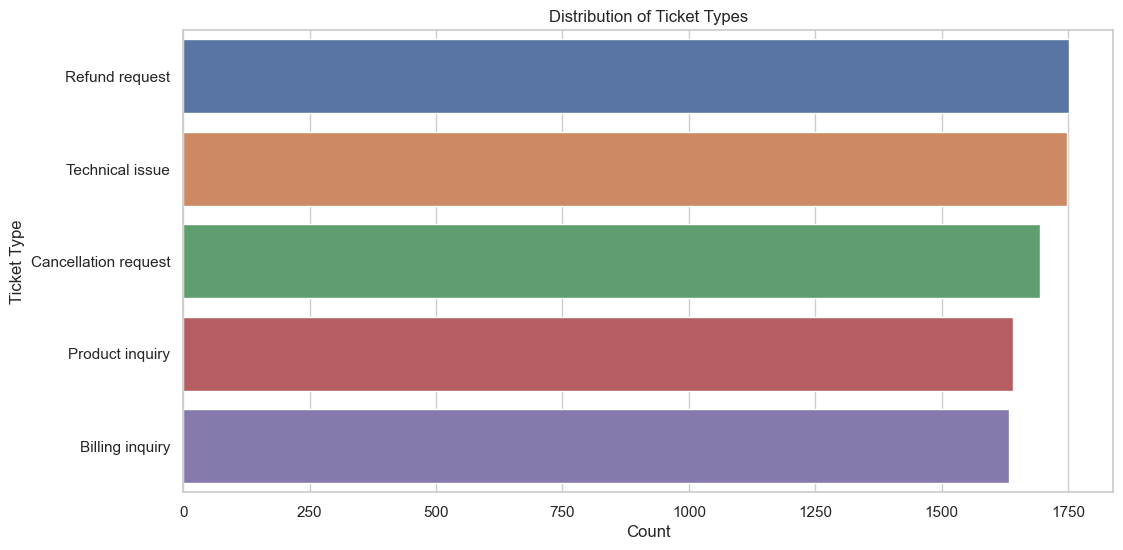

In [32]:
# 2. Distribution of Ticket Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Ticket Type', data=data, order=data['Ticket Type'].value_counts().index)
plt.title('Distribution of Ticket Types')
plt.xlabel('Count')
plt.ylabel('Ticket Type')
plt.show()


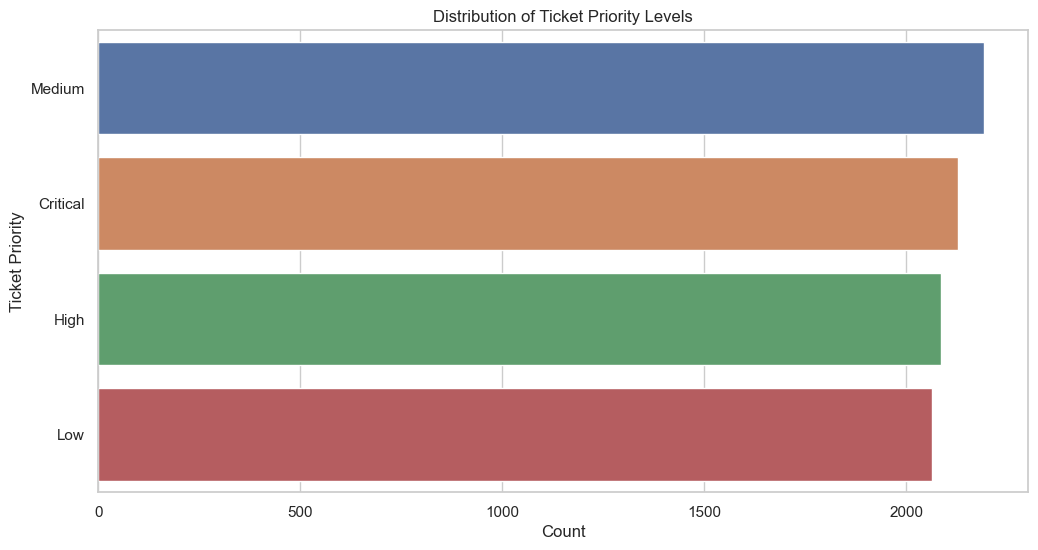

In [33]:

# 3. Distribution of Ticket Priority Levels
plt.figure(figsize=(12, 6))
sns.countplot(y='Ticket Priority', data=data, order=data['Ticket Priority'].value_counts().index)
plt.title('Distribution of Ticket Priority Levels')
plt.xlabel('Count')
plt.ylabel('Ticket Priority')
plt.show()


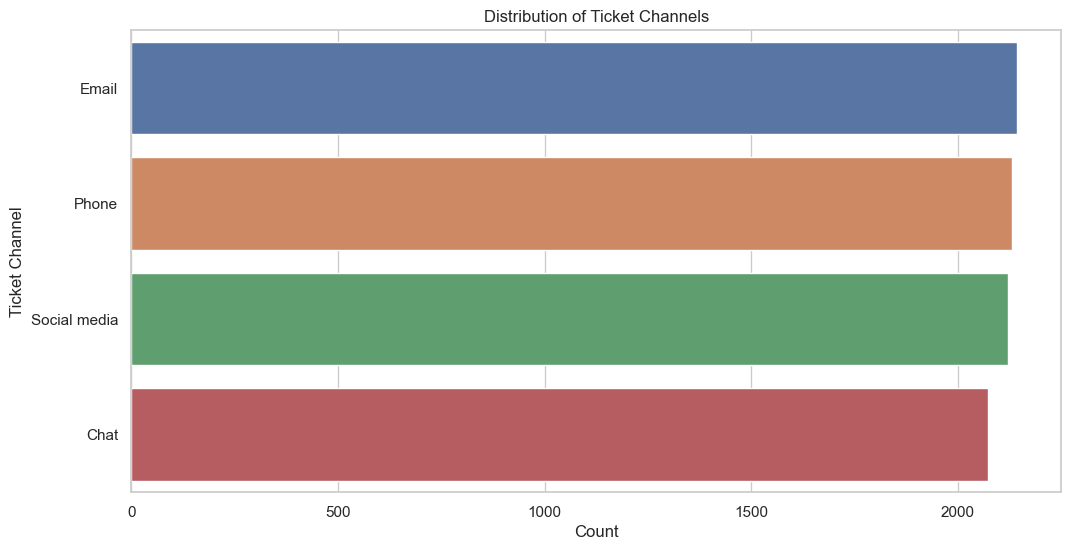

In [34]:
# 4. Distribution of Ticket Channels
plt.figure(figsize=(12, 6))
sns.countplot(y='Ticket Channel', data=data, order=data['Ticket Channel'].value_counts().index)
plt.title('Distribution of Ticket Channels')
plt.xlabel('Count')
plt.ylabel('Ticket Channel')
plt.show()


Exploratory Data Analysis (EDA)


## Customer Demographics

5. Age distribution of Customer
6. Gender distribution.
7. Response and Resolution Times

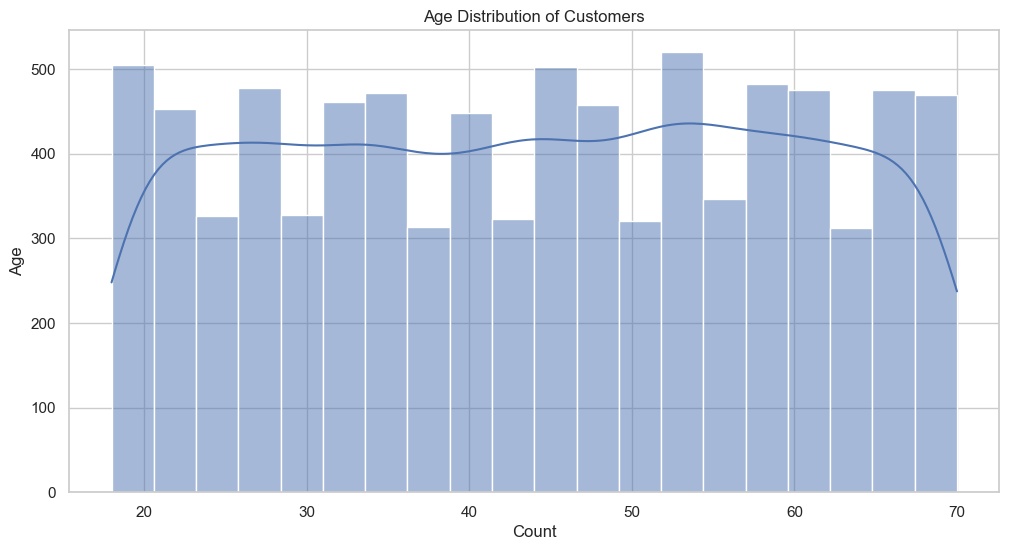

In [35]:

# 5. Age Distribution of Customers
plt.figure(figsize=(12, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()


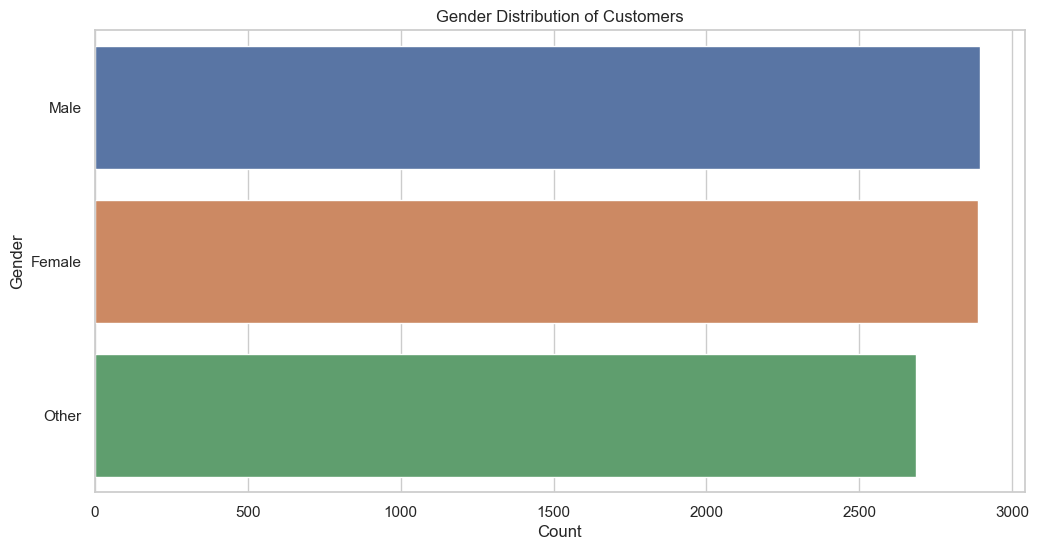

In [36]:
# 6. Gender Distribution of Customers
plt.figure(figsize=(12, 6))
sns.countplot(y='Customer Gender', data=data, order=data['Customer Gender'].value_counts().index)
plt.title('Gender Distribution of Customers')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()


### 7. Distribution of response times.

### 8. Distribution of resolution times.

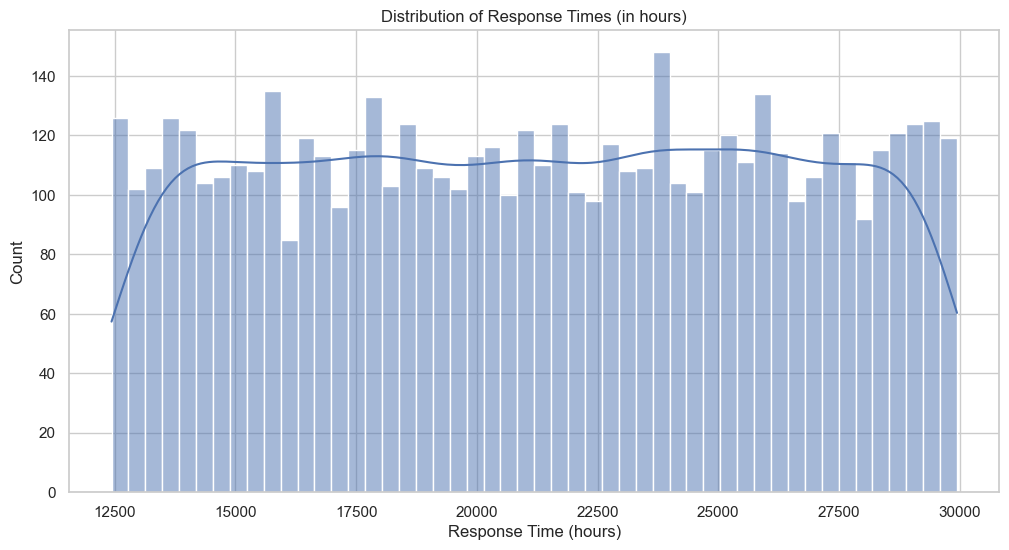

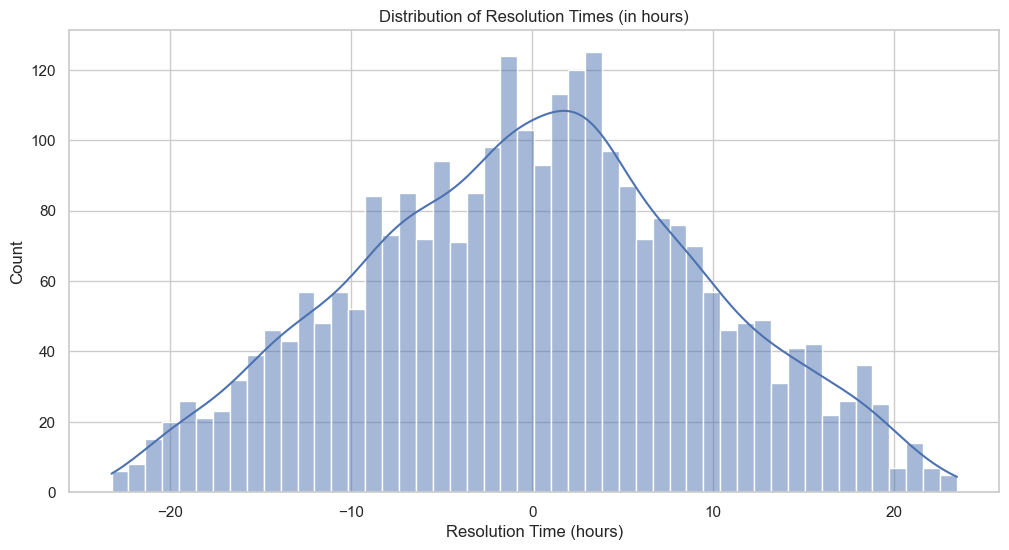

In [37]:
# 7. Response and Resolution Times
plt.figure(figsize=(12, 6))
sns.histplot(data['Response Time'].dropna(), bins=50, kde=True)
plt.title('Distribution of Response Times (in hours)')
plt.xlabel('Response Time (hours)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Resolution Time'].dropna(), bins=50, kde=True)
plt.title('Distribution of Resolution Times (in hours)')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Count')
plt.show()



# Peak Demand Periods:

Identify peak hours, days, and months for ticket submissions.

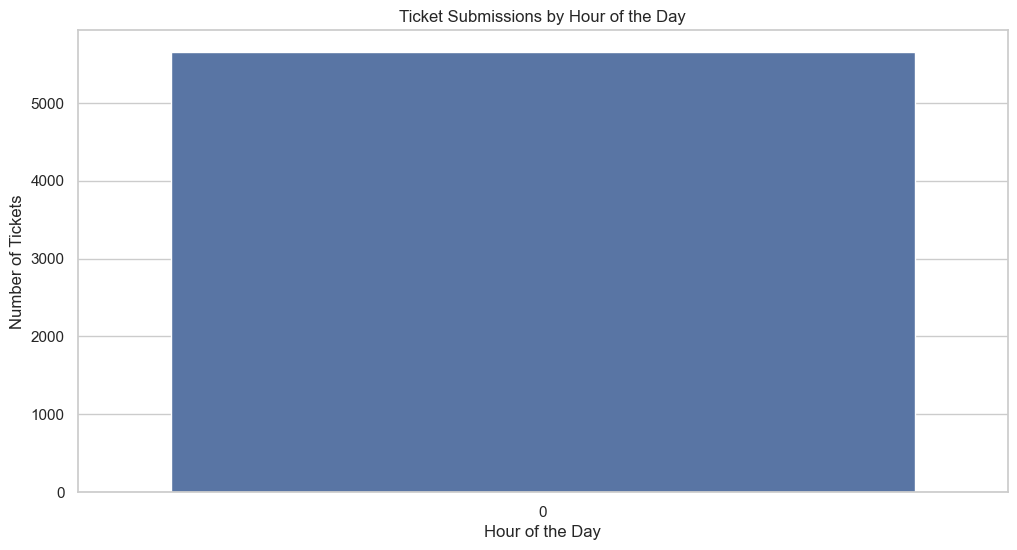

In [38]:

# 8. Peak Demand Periods (Hourly)
plt.figure(figsize=(12, 6))
sns.countplot(data['Response Hour'].dropna())
plt.title('Ticket Submissions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tickets')
plt.show()

## Time Series Forecasting
We will use the Prophet model from Facebook's open-source library for time series forecasting. This model is robust for handling daily seasonality and holidays, making it suitable for predicting ticket volumes.

Prophet Model:
Fit the Prophet model to the daily ticket data for each channel.
Forecast future ticket volumes.
Let's proceed with fitting the Prophet model to our time series data and generating forecasts.

Fit the Prophet Model and Forecast
We'll start with one channel (e.g., Email) to demonstrate the process and then extend it to other channels.

In [39]:
# Prepare data for time series forecasting
# Aggregate the number of tickets per day per channel
data['Ticket Created Date'] = data['Date of Purchase'].dt.date
daily_tickets = data.groupby(['Ticket Created Date', 'Ticket Channel']).size().unstack(fill_value=0)

# Display the first few rows of the prepared time series data
daily_tickets.head()



Ticket Channel,Chat,Email,Phone,Social media
Ticket Created Date,,,,
2020-01-01,3,2,2,1
2020-01-02,2,4,2,4
2020-01-03,5,4,3,3
2020-01-04,2,1,1,4
2020-01-05,4,3,0,6


12:27:52 - cmdstanpy - INFO - Chain [1] start processing
12:27:54 - cmdstanpy - INFO - Chain [1] done processing


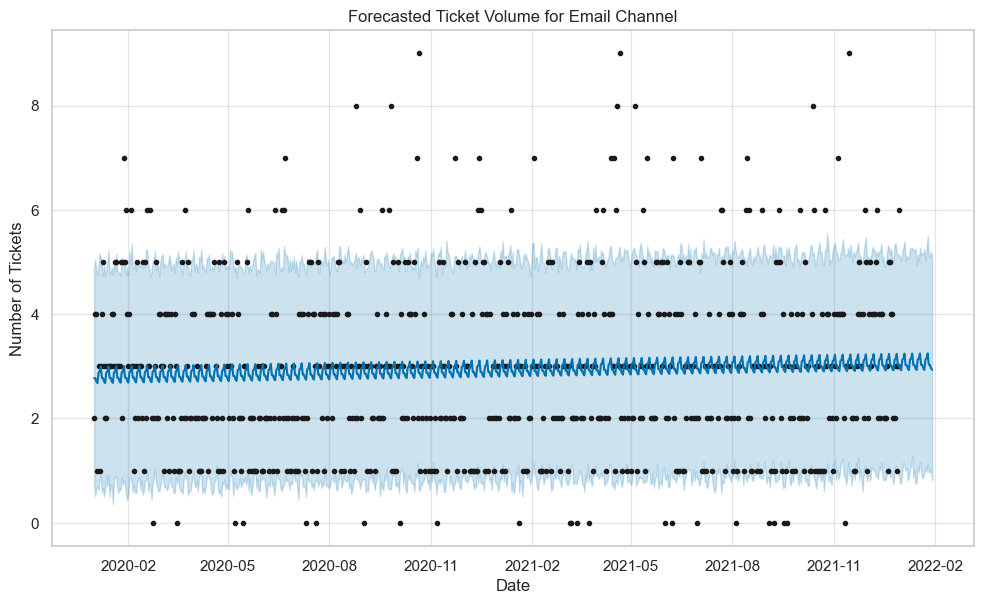

,ds,yhat,yhat_lower,yhat_upper
755,2022-01-25,3.249876,1.135065,5.501689
756,2022-01-26,3.031161,0.965251,5.106068
757,2022-01-27,3.031052,0.975048,5.112742
758,2022-01-28,2.964173,1.027599,5.199557
759,2022-01-29,2.935208,0.818063,5.085996


In [58]:

from prophet import Prophet

# Prepare the data for Prophet model (Email channel as an example)
email_tickets = daily_tickets[['Email']].reset_index()
email_tickets.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for values

# Initialize and fit the Prophet model
model = Prophet()
model.fit(email_tickets)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Predict for next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


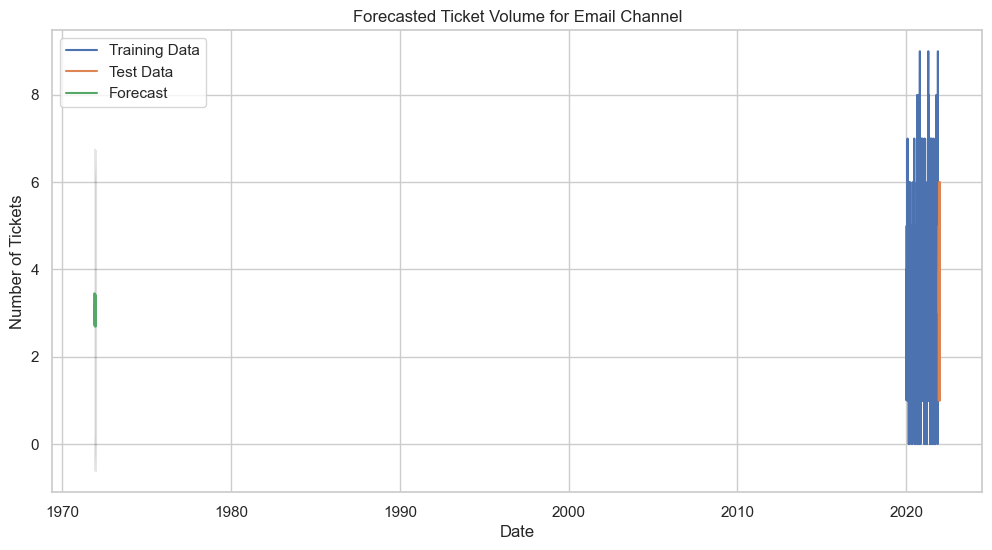

Email,mean,mean_ci_lower,mean_ci_upper
2021-12-01,3.046050,-0.250861,6.342962
2021-12-02,3.455389,0.144829,6.765949
2021-12-03,3.202574,-0.108429,6.513577
2021-12-04,2.716863,-0.594307,6.028033
2021-12-05,2.882578,-0.428742,6.193897
2021-12-06,3.046748,-0.264720,6.358216
2021-12-07,3.009840,-0.301778,6.321458
2021-12-08,2.826614,-0.485167,6.138394
2021-12-09,2.974086,-0.337605,6.285777
2021-12-10,2.698279,-0.613560,6.010118


In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Prepare the data for ARIMA model (Email channel as an example)
email_tickets = daily_tickets[['Email']]

# Split data into training and test sets
train = email_tickets[:-30]
test = email_tickets[-30:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Forecast
forecast = sarima_fit.get_forecast(steps=30)
forecast_index = np.arange(len(train), len(train) + 30)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

# Display forecasted values
forecast_summary = forecast.summary_frame()
forecast_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']]


12:28:26 - cmdstanpy - INFO - Chain [1] start processing
12:28:26 - cmdstanpy - INFO - Chain [1] done processing


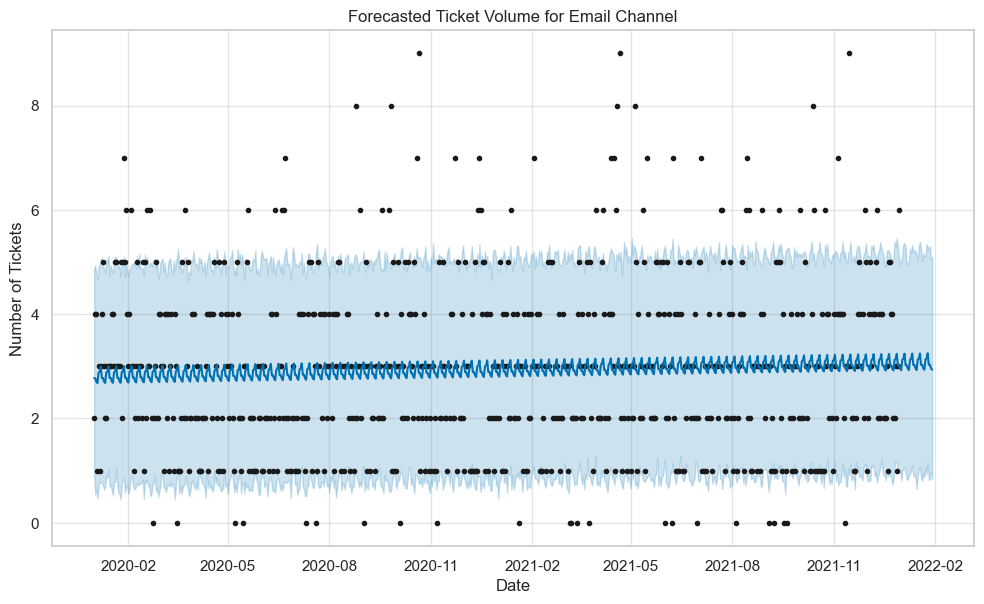

,ds,yhat,yhat_lower,yhat_upper
755,2022-01-25,3.249876,1.150951,5.293284
756,2022-01-26,3.031161,0.820472,5.233669
757,2022-01-27,3.031052,0.833478,5.308622
758,2022-01-28,2.964173,0.971113,5.054865
759,2022-01-29,2.935208,0.835944,5.097029


In [59]:
from prophet import Prophet

# Prepare the data for Prophet model (Email channel as an example)
email_tickets = daily_tickets[['Email']].reset_index()
email_tickets.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for values

# Initialize and fit the Prophet model
model = Prophet()
model.fit(email_tickets)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Predict for next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


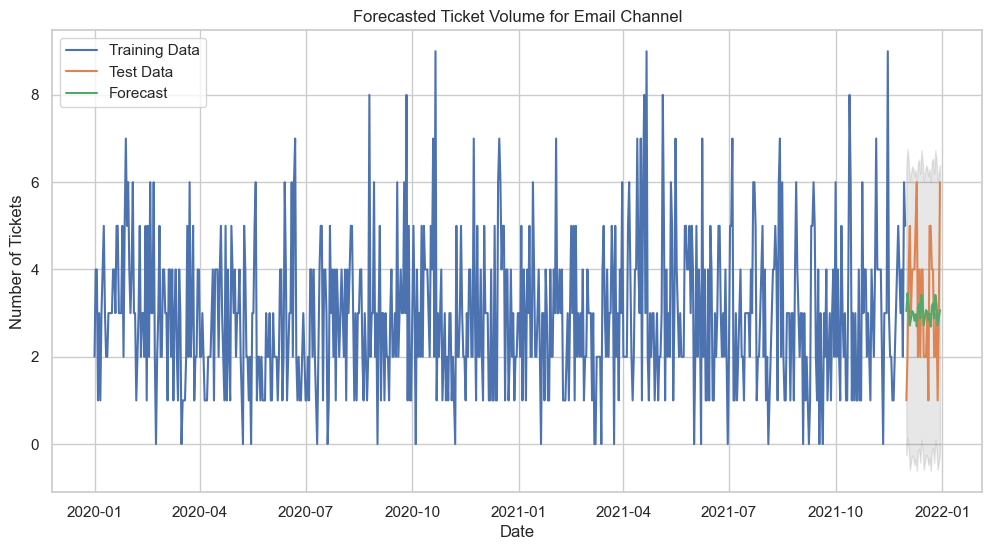

In [43]:
# Ensure forecast index is a proper datetime index
forecast_index = pd.date_range(start=train.index[-1], periods=31, closed='right')

# Plot the forecast again with corrected data handling
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

In [44]:
import pandas as pd

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Prepare data for time series forecasting
# Aggregate the number of tickets per day per channel
data['Ticket Created Date'] = data['Date of Purchase'].dt.date
daily_tickets = data.groupby(['Ticket Created Date', 'Ticket Channel']).size().unstack(fill_value=0)

# Display the first few rows of the prepared time series data
print(daily_tickets.head())


Ticket Channel       Chat  Email  Phone  Social media
Ticket Created Date                                  
2020-01-01              3      2      2             1
2020-01-02              2      4      2             4
2020-01-03              5      4      3             3
2020-01-04              2      1      1             4
2020-01-05              4      3      0             6


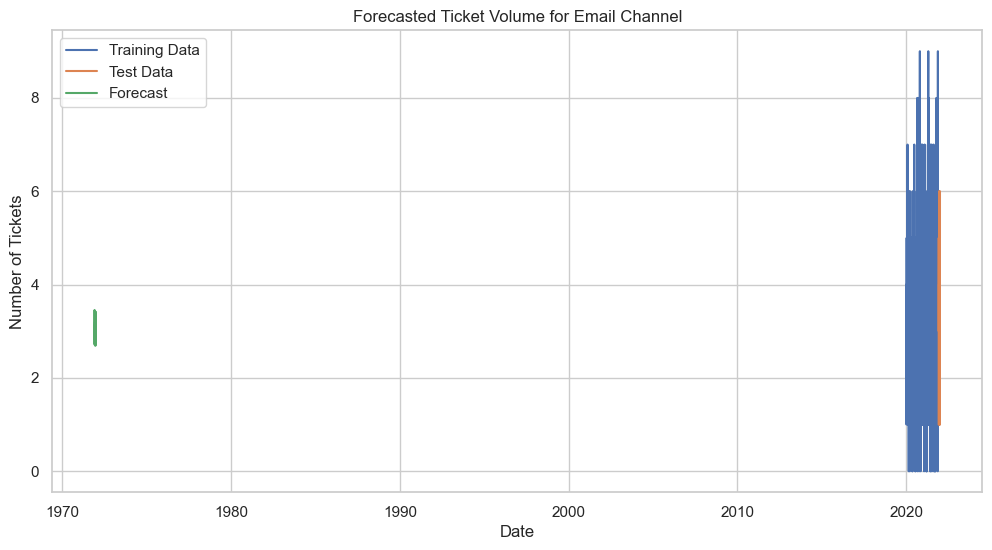

Email           mean  mean_ci_lower  mean_ci_upper
2021-12-21  2.986879      -0.326689       6.300447
2021-12-22  2.691139      -0.622579       6.004857
2021-12-23  3.160442      -0.153426       6.474310
2021-12-24  3.227853      -0.086165       6.541871
2021-12-25  2.882280      -0.432998       6.197557
2021-12-26  3.417556       0.102070       6.733041
2021-12-27  3.189736      -0.125909       6.505381
2021-12-28  2.721875      -0.593925       6.037676
2021-12-29  2.897195      -0.418761       6.213150
2021-12-30  3.070922      -0.245189       6.387033


In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for SARIMA model (Email channel as an example)
email_tickets = daily_tickets[['Email']]

# Split data into training and test sets
train = email_tickets[:-30]
test = email_tickets[-30:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Forecast
forecast = sarima_fit.get_forecast(steps=30)
forecast_index = np.arange(len(train), len(train) + 30)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.title('Forecasted Ticket Volume for Email Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.show()

# Display forecasted values
forecast_summary = forecast.summary_frame()
print(forecast_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']].tail(10))


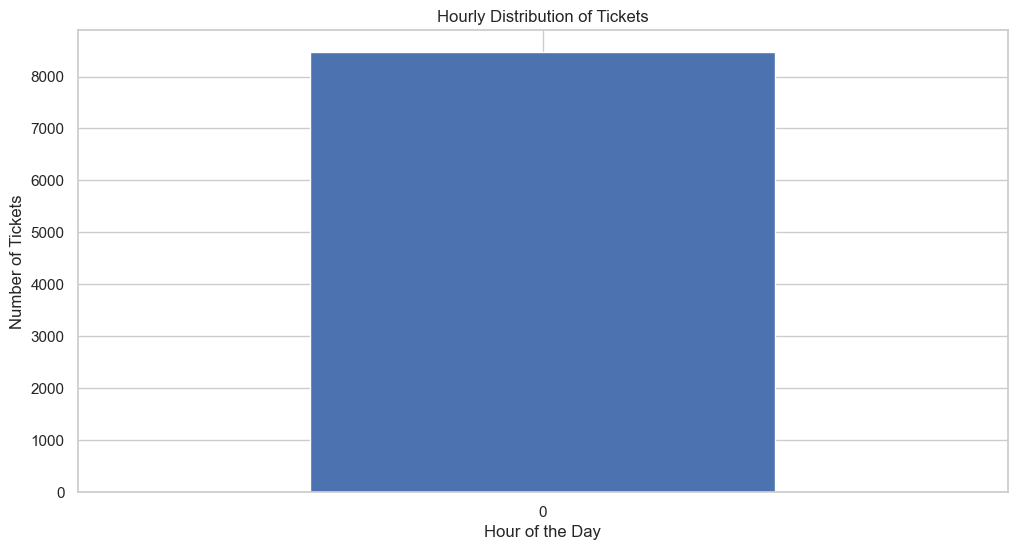

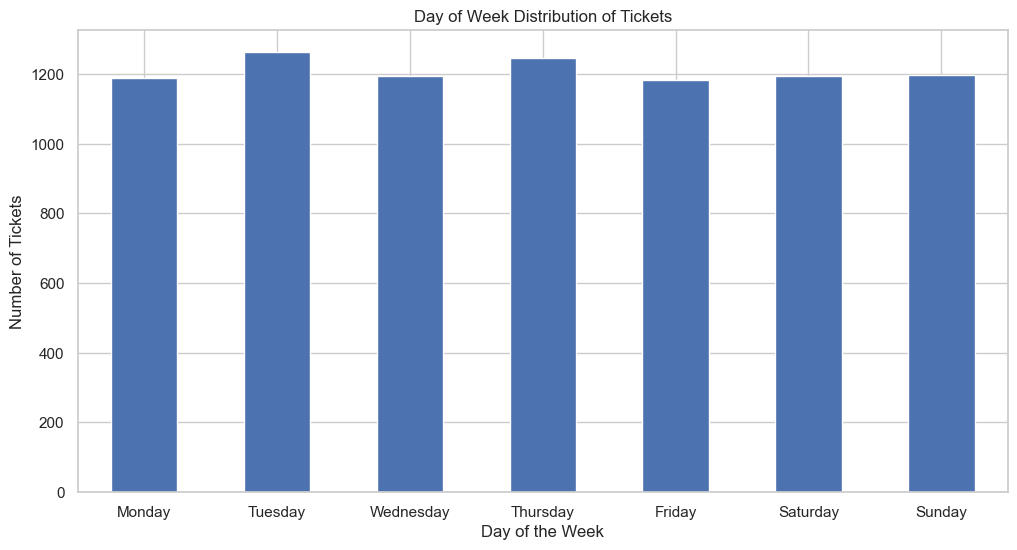

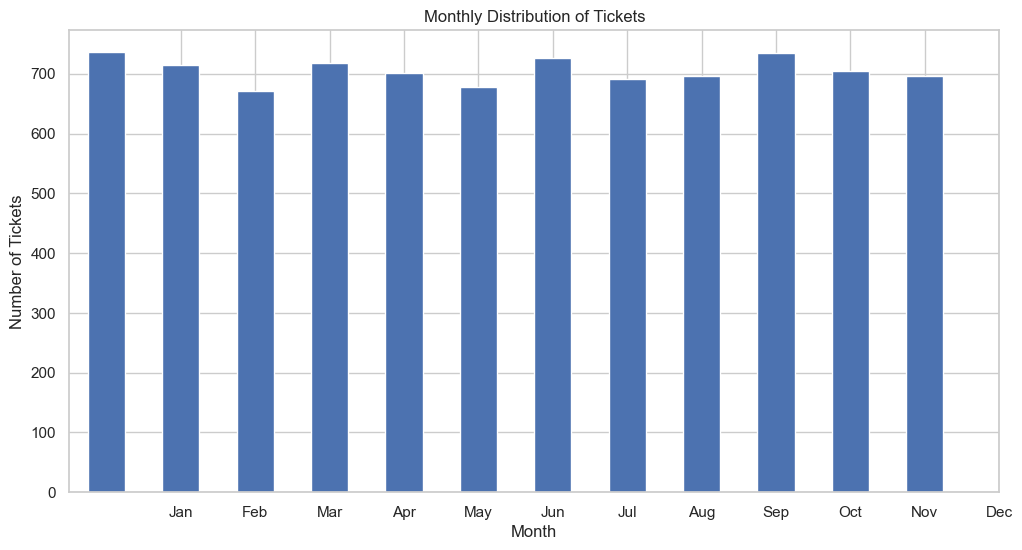

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')

# Extract useful features from datetime columns
data['Purchase Year'] = data['Date of Purchase'].dt.year
data['Purchase Month'] = data['Date of Purchase'].dt.month
data['Purchase Day'] = data['Date of Purchase'].dt.day
data['Purchase Hour'] = data['Date of Purchase'].dt.hour
data['Purchase DayOfWeek'] = data['Date of Purchase'].dt.dayofweek

# Set up the visual style
sns.set(style="whitegrid")

# 1. Hourly Distribution of Tickets
hourly_tickets = data['Purchase Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_tickets.plot(kind='bar')
plt.title('Hourly Distribution of Tickets')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.show()

# 2. Day of Week Distribution of Tickets
dayofweek_tickets = data['Purchase DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
dayofweek_tickets.plot(kind='bar')
plt.title('Day of Week Distribution of Tickets')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

# 3. Monthly Distribution of Tickets
monthly_tickets = data['Purchase Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_tickets.plot(kind='bar')
plt.title('Monthly Distribution of Tickets')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()


# Import Data

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Calculate Response Time in hours
data['Response Time'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600.0

# Handle missing values in Customer Satisfaction Rating
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(), inplace=True)

# Drop rows with missing values in Response Time
data.dropna(subset=['Response Time'], inplace=True)

# Prepare the data
features = data[['Response Time', 'Ticket Channel']]
target = data['Customer Satisfaction Rating']

# Convert categorical feature to numeric
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 1.282509336473123
R^2 Score: -0.3732760307805554


In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Calculate Response Time in hours
data['Response Time'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600.0

# Handle missing values in Customer Satisfaction Rating
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(), inplace=True)

# Drop rows with missing values in Response Time
data.dropna(subset=['Response Time'], inplace=True)

# Discretize the Customer Satisfaction Rating
bins = [0, 2, 3, 4, 5]
labels = ['Low', 'Medium', 'High', 'Very High']
data['Satisfaction Category'] = pd.cut(data['Customer Satisfaction Rating'], bins=bins, labels=labels, include_lowest=True)

# Prepare the data
features = data[['Response Time', 'Ticket Channel']]
target = data['Satisfaction Category']

# Convert categorical features to numeric
features = pd.get_dummies(features)
target = target.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  5  21  51  11]
 [ 20  37 152  24]
 [ 47 139 454  72]
 [  7  20  63   7]]
              precision    recall  f1-score   support

        High       0.06      0.06      0.06        88
         Low       0.17      0.16      0.16       233
      Medium       0.63      0.64      0.63       712
   Very High       0.06      0.07      0.07        97

    accuracy                           0.45      1130
   macro avg       0.23      0.23      0.23      1130
weighted avg       0.44      0.45      0.44      1130



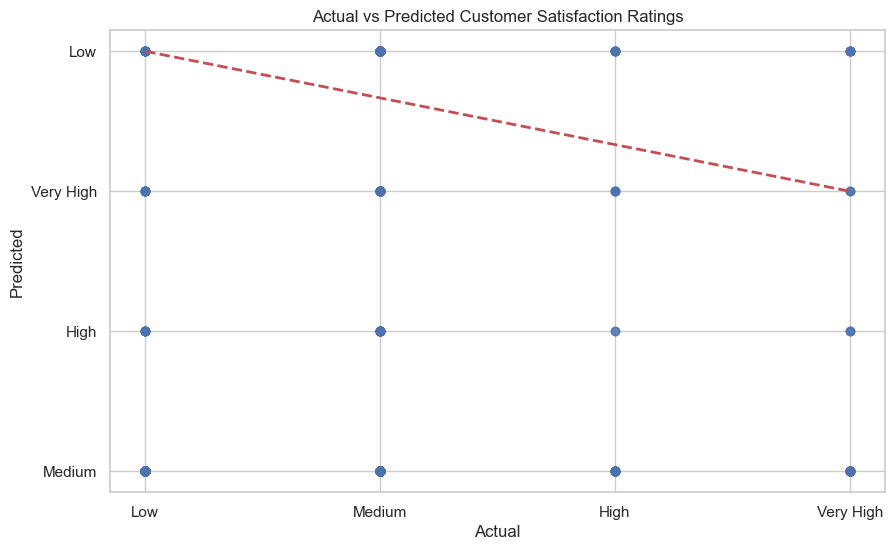

In [49]:
import matplotlib.pyplot as plt

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Customer Satisfaction Ratings')
plt.show()


<Figure size 1000x600 with 0 Axes>

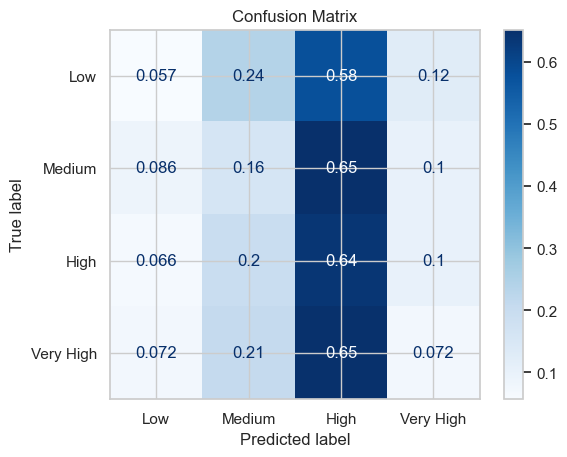

              precision    recall  f1-score   support

         Low       0.06      0.06      0.06        88
      Medium       0.17      0.16      0.16       233
        High       0.63      0.64      0.63       712
   Very High       0.06      0.07      0.07        97

    accuracy                           0.45      1130
   macro avg       0.23      0.23      0.23      1130
weighted avg       0.44      0.45      0.44      1130



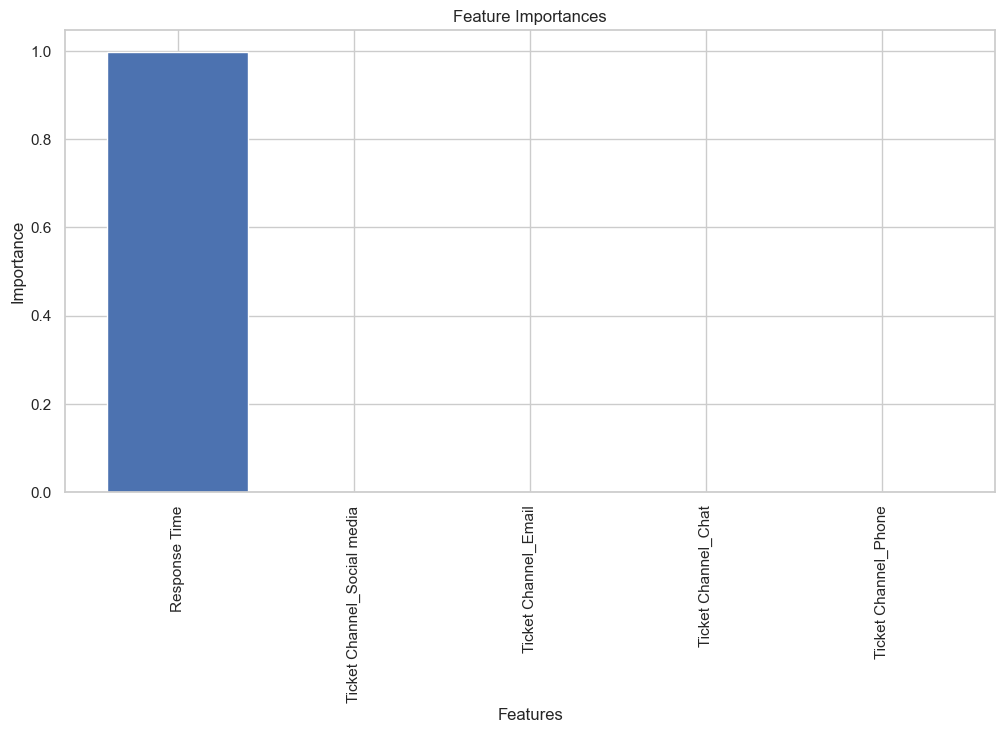

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC

# Load the dataset
file_path = 'customer_support_tickets.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Calculate Response Time in hours
data['Response Time'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600.0

# Handle missing values in Customer Satisfaction Rating
data['Customer Satisfaction Rating'].fillna(data['Customer Satisfaction Rating'].mean(), inplace=True)

# Drop rows with missing values in Response Time
data.dropna(subset=['Response Time'], inplace=True)

# Discretize the Customer Satisfaction Rating
bins = [0, 2, 3, 4, 5]
labels = ['Low', 'Medium', 'High', 'Very High']
data['Satisfaction Category'] = pd.cut(data['Customer Satisfaction Rating'], bins=bins, labels=labels, include_lowest=True)

# Prepare the data
features = data[['Response Time', 'Ticket Channel']]
target = data['Satisfaction Category']

# Convert categorical features to numeric
features = pd.get_dummies(features)
target = target.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=labels))

# Feature Importance
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
